In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


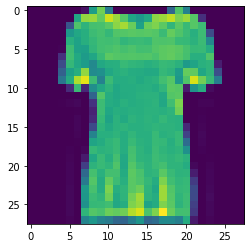

In [5]:
plt.imshow(X_train_full[10])

In [6]:
y_train_full[10]

0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
X_train_n = X_train_full/255.
X_test_n = X_test/255.

In [10]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


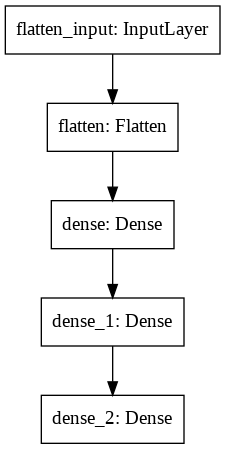

In [14]:
import pydot
keras.utils.plot_model(model)

In [15]:
weights, biases = model.layers[1].get_weights()

In [16]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [19]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8565 - val_loss: 0.3918 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3941 - accuracy: 0.8618 - val_loss: 0.3749 - val_accuracy: 0.8686
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3635 - accuracy: 0.8712 - val_loss: 0.3621 - val_accuracy:

In [22]:
model_history.params


{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [23]:
model_history.history

{'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8453999757766724,
  0.8564545512199402,
  0.8618181943893433,
  0.867690920829773,
  0.8712000250816345,
  0.8747636079788208,
  0.8788727521896362,
  0.8825272917747498,
  0.8834182024002075,
  0.8863636255264282,
  0.8894000053405762,
  0.8913090825080872,
  0.8941090703010559,
  0.8971090912818909,
  0.8978727459907532,
  0.8997818231582642,
  0.9018545746803284,
  0.9037818312644958,
  0.9056181907653809,
  0.9075090885162354,
  0.9083818197250366,
  0.90989089012146,
  0.9120727181434631,
  0.913454532623291,
  0.915363609790802,
  0.9157817959785461,
  0.9185090661048889,
  0.9187090992927551],
 'loss': [0.7236781120300293,
  0.4843233525753021,
  0.43926575779914856,
  0.41252589225769043,
  0.3941323161125183,
  0.37538430094718933,
  0.363508939743042,
  0.35204508900642395,
  0.34177666902542114,
  0.33245787024497986,
  0.3243776857852936,
  0.31508147716522217,
  0.30827346444129944,
  0.30234867334365845,
  0.2949

In [25]:
accuracy = model_history.history['accuracy']
loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

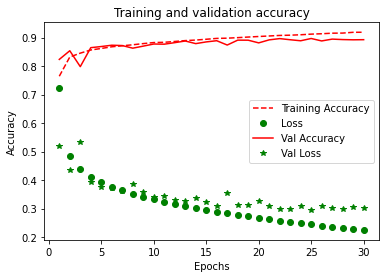

In [40]:
plt.plot(epochs, accuracy, 'r--',label = 'Training Accuracy')
plt.plot(epochs, loss, 'go' , label = 'Loss')
plt.plot(epochs, val_acc, 'r-', label = 'Val Accuracy')
plt.plot(epochs, val_loss, 'g*', label = 'Val Loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [42]:
X_new = X_test[:3]

In [43]:
y_pred = model.predict(X_new)

In [45]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred[2]

array([1.70320754e-06, 9.99997854e-01, 1.46915431e-08, 3.57611384e-07,
       1.01273955e-07, 1.23489028e-13, 3.54276775e-10, 1.79011862e-13,
       8.14468226e-09, 1.12665237e-12], dtype=float32)

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [49]:
name_pred = np.array(class_names)

In [50]:
name_pred[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [51]:
y_pred.dtype

dtype('int64')

AxesImage(54,36;334.8x217.44)
Ankle boot


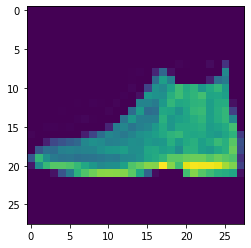

In [55]:
print(plt.imshow(X_test[0]))
print(name_pred[y_pred[0]])

AxesImage(54,36;334.8x217.44)
Pullover


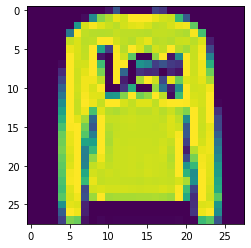

In [56]:
print(plt.imshow(X_test[1]))
print(name_pred[y_pred[1]])

AxesImage(54,36;334.8x217.44)
Trouser


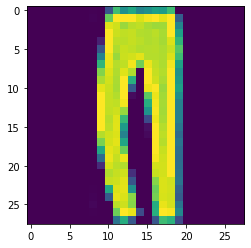

In [57]:
print(plt.imshow(X_test[2]))
print(name_pred[y_pred[2]])